Estimate initial temperature (theory and notation is from https://link.springer.com/article/10.1023/B:COAP.0000044187.23143.bd)

In [1]:
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt
from CompilerQC import Graph, Qbits, Polygons, Energy, MC, paths

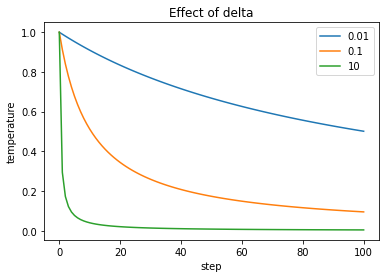

In [2]:
def visualize_delta(delta):
    """visualize the effect of delta in the temperature schedule"""
    t, temperature = 1, [1]
    for i in range(100):
        t = t / (1 + t * np.log(1 + delta))
        temperature.append(t)
    return temperature
for delta in [0.01, 0.1, 10]:
    plt.plot(visualize_delta(delta), label=str(delta))
plt.ylabel('temperature')
plt.xlabel('step')
plt.title('Effect of delta')
plt.legend()

In [18]:
N = 8
graph = Graph.complete(N)
qbits = Qbits.init_qbits_from_dict(graph,dict())
polygon_object = Polygons(qbits)
energy = Energy(polygon_object, scaling_for_plaq3=10, scaling_for_plaq4=14)
mc = MC(energy, delta=0.07, chi_0=0.99, repetition_rate=35, recording=True)
mc.current_temperature = mc.initial_temperature()
print(mc.current_temperature)
mc.record_temperature.append(mc.current_temperature)

6680.805047262199


In [19]:
print(mc.n_total_steps)

0


In [22]:
%%time
mc.apply('', 10000)

CPU times: user 4.15 s, sys: 3.51 ms, total: 4.15 s
Wall time: 4.15 s


65.77907999999996

In [21]:
%%time
for i in range(10000):
    mc.apply('',1)
print(mc.n_total_steps)

20000
CPU times: user 4.44 s, sys: 0 ns, total: 4.44 s
Wall time: 4.44 s


In [ ]:
mc.energy.scaling_for_plaq3

In [ ]:
plt.plot(mc.record_temperature, label='temperature')
plt.plot(mc.record_mean_energy, label='mean energy')
plt.plot(mc.record_total_energy, label='current energy')
plt.xlabel('step')
plt.ylabel('energy and temperature')
plt.legend()

In [ ]:
plt.plot([mc.record_acc_probability[i-1] for i in mc.record_bad_moves])
plt.title('acceptance probability of bad moves')

In [ ]:
plt.plot([mc.record_acc_probability[i-1] for i in mc.record_good_moves])
plt.title('acceptance probability of good moves')

In [ ]:
plt.plot([mc.record_acc_probability[i-1] for i in mc.record_rejected_moves])
plt.title('acceptance probability of rejected moves')

In [ ]:
plt.plot([len([i for i in sorted(mc.record_good_moves + mc.record_bad_moves) if i in range(k * mc.repetition_rate, (k+1) * mc.repetition_rate)]) / mc.repetition_rate
for k in range(len(mc.record_temperature) // mc.repetition_rate)])
plt.ylabel('accepted/proposed moves')
plt.xlabel('temperature')

In [ ]:
mc.energy.polygon_object.visualize(), mc.energy.polygon_object.number_of_plaqs, graph.C